# Импорт Библиотек

In [1]:
!pip install catboost

In [2]:
!pip install shap

In [4]:
conda activate ML_pipe


CondaError: Run 'conda init' before 'conda activate'


Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import numpy as np
import seaborn

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn. linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from warnings import simplefilter
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score

from numpy import nan

In [59]:
import shap 

# Загрузка данных

In [62]:
#data = pd.read_excel(r"C:\Users\shurf\Downloads\Telegram Desktop\ML_model 19.02.24.xlsx")
#data = pd.read_excel(r"E:\Рак поджелудочной железы\ВКР\Набор материалла\Объединение датасетов\Data 02.24\ML_model 19.02.24.xlsx")
#x = "E:/Рак поджелудочной железы/ВКР/Набор материалла/Объединение датасетов/Data 02.24/"
x = "/home/genetics/ML/"
data = pd.read_excel("/home/genetics/ML/ML_model 19.02.24.xlsx")

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 31 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Возраст                                                          87 non-null     float64
 1   Пол                                                              87 non-null     float64
 2   Резекция сосудов                                                 87 non-null     float64
 3   Размер  Вирсунгова протока КТ, мм                                88 non-null     float64
 4   Анастомоз по Блюмгарту                                           87 non-null     float64
 5   Анастомоз по РУ                                                  87 non-null     float64
 6   Время операции, мин                                              87 non-null     float64
 7   Объем кровопотери, мл                         

In [64]:
data = data.rename(columns = {'Гистотип: аденокарцинома -2, нейроэндоксринная -1, доброкач - 0' : 'Морфологический тип опухоли', 'Амилаза крови 1-15 п/о дни': 'Амилаза крови 10-15 п/о дни'})

# Удаление пропусков

In [65]:
# Числовые
data['Возраст'].fillna(data['Возраст'].mean(), inplace=True)
data['Время операции, мин'].fillna(data['Время операции, мин'].mean(), inplace=True)
data['Объем кровопотери, мл'].fillna(data['Объем кровопотери, мл'].mean(), inplace=True)
data['Продолжительность дренирования, сут'].fillna(data['Продолжительность дренирования, сут'].mean(), inplace=True)
data['ИМТ'].fillna(data['ИМТ'].mean(), inplace=True)
data['Размеры опухоли, см3'].fillna(data['Размеры опухоли, см3'].mean(), inplace=True)
data['Амилаза дренажа 1-5 п/о дни'].fillna(data['Амилаза дренажа 1-5 п/о дни'].mean(), inplace=True)
data['Амилаза дренажа 10-15 п/о дни'].fillna(data['Амилаза дренажа 10-15 п/о дни'].mean(), inplace=True)
data['Лейкоциты, ОАК 5-7 п/о дни'].fillna(data['Лейкоциты, ОАК 5-7 п/о дни'].mean(), inplace=True)
data['Лейкоциты, ОАК 10-15 п/о дни'].fillna(data['Лейкоциты, ОАК 10-15 п/о дни'].mean(), inplace=True)

# Категориальные
data['Пол'].fillna(data['Пол'].mode()[0], inplace=True)
data['Резекция сосудов'].fillna(data['Резекция сосудов'].mode()[0], inplace=True)
data['Размер  Вирсунгова протока КТ, мм'].fillna(data['Размер  Вирсунгова протока КТ, мм'].mode()[0], inplace=True)
data['Анастомоз по Блюмгарту '].fillna(data['Анастомоз по Блюмгарту '].mode()[0], inplace=True)
data['Анастомоз по РУ'].fillna(data['Анастомоз по РУ'].mode()[0], inplace=True)
data['Пункционная энтеростома'].fillna(data['Пункционная энтеростома'].mode()[0], inplace=True)
data['НАПХТ'].fillna(data['НАПХТ'].mode()[0], inplace=True)
data['Морфологический тип опухоли'].fillna(data['Морфологический тип опухоли'].mode()[0], inplace=True)
data['G'].fillna(data['G'].mode()[0], inplace=True)
data['R-cтатус '].fillna(data['R-cтатус '].mode()[0], inplace=True)
data['Стадия'].fillna(data['Стадия'].mode()[0], inplace=True)
data['Периневральная инвазия'].fillna(data['Периневральная инвазия'].mode()[0], inplace=True)
data['Васкулярная инвазия'].fillna(data['Васкулярная инвазия'].mode()[0], inplace=True)
data['Послеоперационная смерть'].fillna(data['Послеоперационная смерть'].mode()[0], inplace=True)

In [66]:
data.loc[(data['Лейкоциты, ОАК 1-5 п/о дни'] == ' 8,9 _x000D_\n'), ['Лейкоциты, ОАК 1-5 п/о дни']] = None
data['Лейкоциты, ОАК 1-5 п/о дни'].astype('float')
data['Лейкоциты, ОАК 1-5 п/о дни'].fillna(data['Лейкоциты, ОАК 1-5 п/о дни'].mean(), inplace=True)

In [67]:
data.loc[(data['Лейкоциты, ОАК 1-3 п/о дни'] == ' 8,9 _x000D_\n'), ['Лейкоциты, ОАК 1-3 п/о дни']] = None
data['Лейкоциты, ОАК 1-3 п/о дни'].astype('float')
data['Лейкоциты, ОАК 1-3 п/о дни'].fillna(data['Лейкоциты, ОАК 1-3 п/о дни'].mean(), inplace=True)

In [68]:
data['Амилаза крови 1-5 п/о дни'].fillna(data.query('`Амилаза крови 1-5 п/о дни`  < 120')['Амилаза крови 1-5 п/о дни'].mean(), inplace=True)
data['Амилаза крови 10-15 п/о дни'].fillna(data.query('`Амилаза крови 10-15 п/о дни`  < 120')['Амилаза крови 10-15 п/о дни'].mean(), inplace=True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Возраст                              89 non-null     float64
 1   Пол                                  89 non-null     float64
 2   Резекция сосудов                     89 non-null     float64
 3   Размер  Вирсунгова протока КТ, мм    89 non-null     float64
 4   Анастомоз по Блюмгарту               89 non-null     float64
 5   Анастомоз по РУ                      89 non-null     float64
 6   Время операции, мин                  89 non-null     float64
 7   Объем кровопотери, мл                89 non-null     float64
 8   Продолжительность дренирования, сут  89 non-null     float64
 9   Пункционная энтеростома              89 non-null     float64
 10  ИМТ                                  89 non-null     float64
 11  НАПХТ                             

In [70]:
data = data.drop(['R-cтатус ' , 
           'Продолжительность дренирования, сут', 'Послеоперационная смерть', 'Лейкоциты, ОАК 1-3 п/о дни'], axis = 1)

# Корреляция кендала

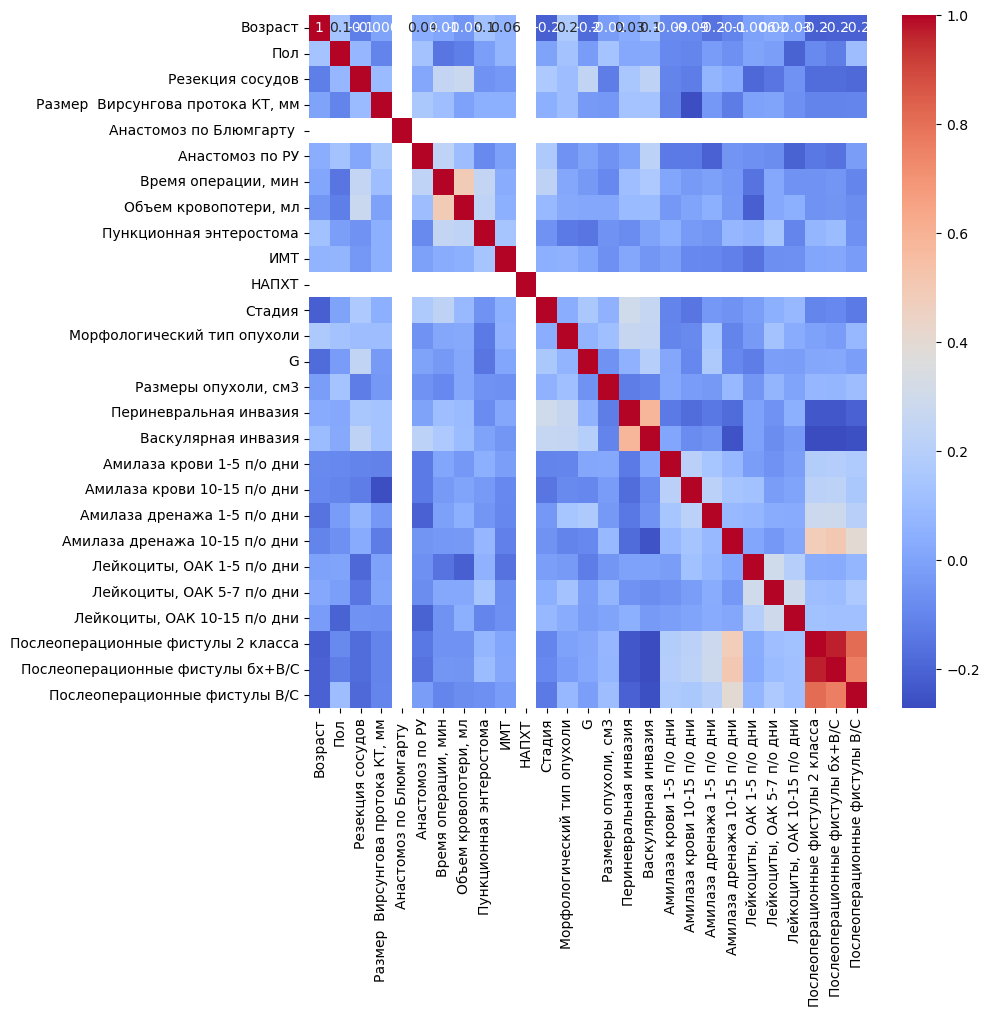

In [71]:
fig, ax = plt.subplots(figsize=(9, 9))
seaborn.heatmap(data.corr(method='kendall'), annot = True, fmt='.1g', cmap= 'coolwarm')
None

# Подготовка данных

In [72]:
num_columns = ['Возраст',
              'Время операции, мин',
              'Объем кровопотери, мл',
              #'Продолжительность дренирования, сут',
              'ИМТ',
              'Размеры опухоли, см3',
              'Амилаза крови 1-5 п/о дни',
              'Амилаза крови 10-15 п/о дни',
              'Амилаза дренажа 1-5 п/о дни',
              'Амилаза дренажа 10-15 п/о дни' ,
              # 'Лейкоциты, ОАК 1-3 п/о дни' ,
              'Лейкоциты, ОАК 1-5 п/о дни' ,
              'Лейкоциты, ОАК 5-7 п/о дни',
              'Лейкоциты, ОАК 10-15 п/о дни'
              ]
cat_columns = ['Пол',
              'Резекция сосудов',
              'Размер  Вирсунгова протока КТ, мм',
              'Анастомоз по Блюмгарту ',
              'Анастомоз по РУ',
              'Пункционная энтеростома',
               'НАПХТ',
               'Стадия',
               'Морфологический тип опухоли',
               'G',
               #'R-cтатус ',
               'Периневральная инвазия',
               'Васкулярная инвазия',
               #'Послеоперационная смерть'
              ]

# Пайплайн

In [73]:
X = data.drop(['Послеоперационные фистулы 2 класса', 'Послеоперационные фистулы В/С', 'Послеоперационные фистулы бх+В/С'], axis=1)
y = data['Послеоперационные фистулы бх+В/С']

columns_names = cat_columns + num_columns

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Послеоперационные фистулы 2 класса', 'Послеоперационные фистулы В/С', 'Послеоперационные фистулы бх+В/С'], axis=1),
    data['Послеоперационные фистулы бх+В/С'],
    test_size = 0.25, 
    random_state = 42,
    stratify = data['Послеоперационные фистулы бх+В/С'])

In [75]:
encoder = LabelEncoder()
y_train_trans = encoder.fit_transform(y_train)
y_test_trans = encoder.transform(y_test)

In [76]:
data_preprocessor = ColumnTransformer(
    [
        ('cat', StandardScaler(), cat_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

In [77]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=42))
    ]
) 

In [78]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
  {
    'models': [DecisionTreeClassifier(random_state=42)],
    'models__max_depth': [None, 1, 3, 5, 10, 20, 30],
    'models__max_features': range(1, 28)
},
    
   # словарь для модели KNeighborsClassifier() 
    {
       'models': [KNeighborsClassifier()],
       'models__n_neighbors': range(2, 5) 
   },
    
       # словарь для модели RandomForestClassifier() 
    {
       'models': [RandomForestClassifier(random_state=42)],
        'models__n_estimators': [50, 100, 200, 150, 500, 1000],
        'models__max_depth': [None, 1, 3, 5, 10, 20, 30],
        'models__min_samples_leaf': [1, 2, 4, 6, 8],
        'models__max_features': range(1, 28)
   },
    
           # словарь для модели CatBoostClassifier() 
    {
       'models': [CatBoostClassifier()],
        'models__depth': [4,5,6,7,8,9, 10],
        'models__learning_rate' : [0.01,0.02,0.03,0.04, 0.001, 0.0001, 0.1],
        'models__iterations'    : [10, 20,30,40,50,60,70,80,90, 100, 500]
   },
    
    # словарь для модели SVC()
    
        {
        'models': [SVC(probability=True, random_state=42)],
        'models__C':[0.1,1,10,50,100],
        'models__kernel':['rbf','poly','sigmoid','linear'],
        'models__degree':[1,2,3,4,5,6],
         'models__gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=42, 
            solver='liblinear', 
        )],
        'models__C': range(1, 10),
        'models__penalty': ['l1','l2'],
        'models__max_features': range(1, 28)
    },
    
        # словарь для модели Ridge()
    {
        'models': [Ridge()],
        "models__alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20],
        'models__max_features': range(1, 28)
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=43,
    n_jobs=-1
)
randomized_search.fit(X, y)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', StandardScaler(),
                                                  ['Пол', 'Резекция сосудов',
                                                   'Размер  Вирсунгова протока '
                                                   'КТ, мм',
                                                   'Анастомоз по Блюмгарту ',
                                                   'Анастомоз по РУ',
                                                   'Пункционная энтеростома',
                                                   'НАПХТ', 'Стадия',
                                                   'Морфологический тип '
                                                   'опухоли',
                                                   'G',
                                                   'Периневральная инвазия',
               

In [79]:
print('Метрика лучшей модели на тестовой выборке:', roc_auc_score(randomized_search.best_estimator_.predict(X_test), y_test_trans))

Метрика лучшей модели на тестовой выборке: 1.0


### Лучшая модель

In [80]:
X_train_get = pd.DataFrame(data_preprocessor.fit_transform(X_train))
X_test_get = pd.DataFrame(data_preprocessor.transform(X_test))

In [81]:
best_model = RandomForestClassifier(max_depth=3, max_features=9,
                                        min_samples_leaf=4, n_estimators=50,
                                        random_state=42)
best_model.fit(X_train_get, y_train_trans)

RandomForestClassifier(max_depth=3, max_features=9, min_samples_leaf=4,
                       n_estimators=50, random_state=42)

In [82]:
X_train_get.columns = [columns_names]
X_test_get.columns = [columns_names]

### Импортанс

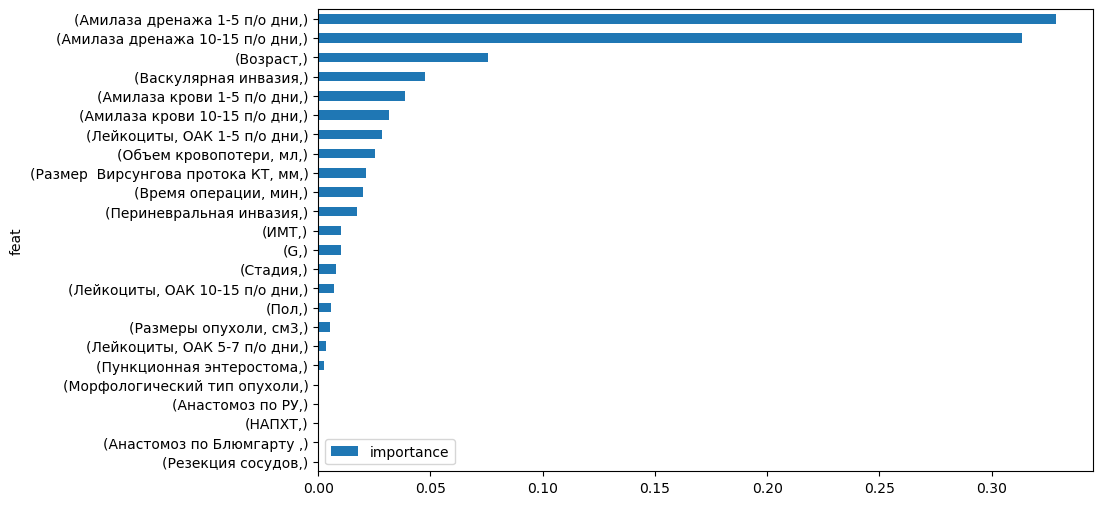

In [83]:
imp =  pd.DataFrame(list(zip(best_model.feature_importances_, X_train_get.columns)))
imp.columns = ['importance', 'feat']

imp.sort_values('importance', ascending = True).plot(x='feat', y='importance', kind='barh', figsize=(10, 6))
None

### Shap

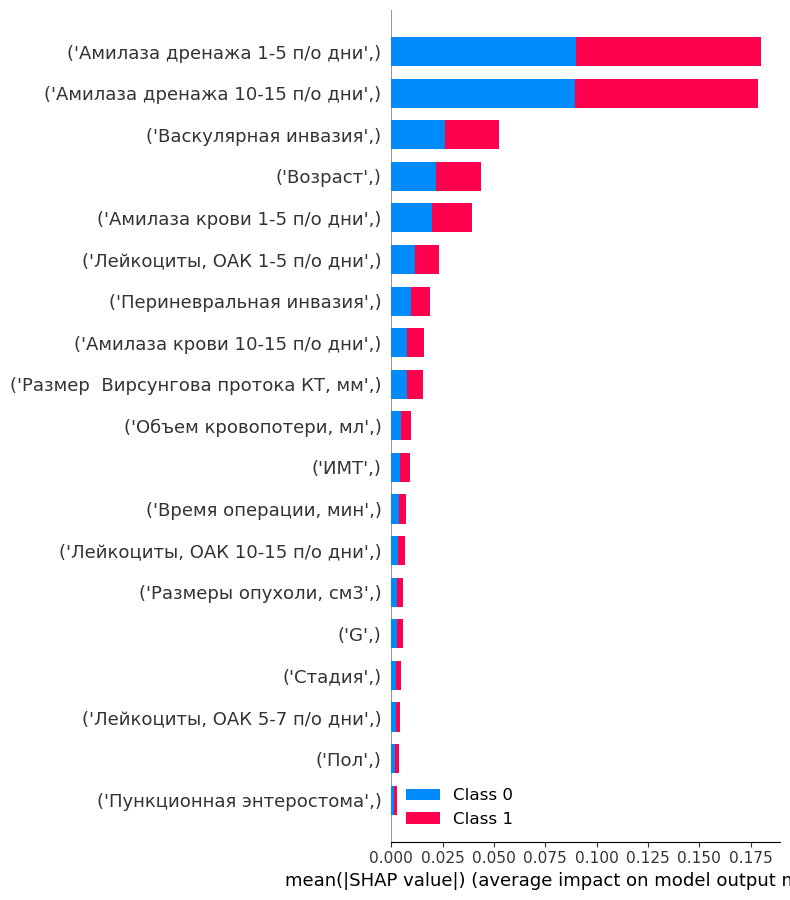

In [84]:
shap_test = shap.TreeExplainer(best_model).shap_values(X_train_get)
shap.summary_plot(shap_test, X_train_get,
                      max_display=19)

# Сбор метрик У = Послеоперационные фистулы бх+В/С

In [85]:
def roc_multi(y_test, y_score):

    n_classes = y_score.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test==i, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    return roc_auc, fpr, tpr

In [86]:
ds = []

## X = Все данные, У = Послеоперационные фистулы бх+В/С

### Логистическая регрессия

In [87]:
simplefilter(action='ignore', category=FutureWarning)

param_grid ={
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['liblinear', 'sag','saga'],
    'max_iter' : [10000]
    #'penalty' : ['l2', 'l1']
    }


clf_model = LogisticRegression()
grid_search = GridSearchCV(clf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1)


#grid_search = LogisticRegressionCV(n_jobs=-1,scoring='roc_auc',solver='lbfgs',penalty='l2', max_iter = 10000)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics.xlsx")

Best Hyperparameters: {'C': 9.999999999999999e-11, 'max_iter': 10000, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.975
roc_auc по Шурику: 0.8578947368421053
roc_auc средний: 0.8488095238095237


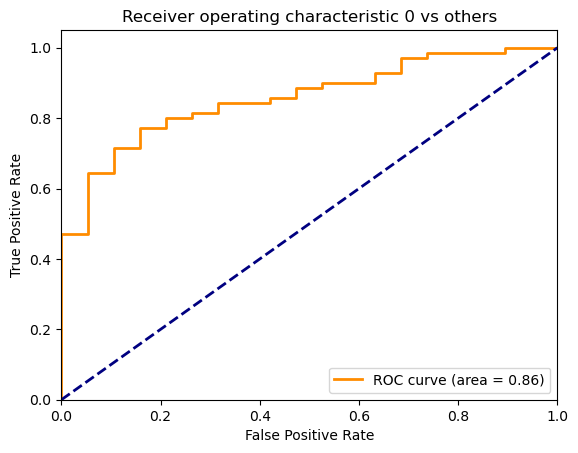

In [88]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Random forest

In [89]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 10)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics.xlsx")

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 700}
Best Cross-Validation Score: 0.9964285714285716
roc_auc по Шурику: 0.981203007518797
roc_auc средний: 0.9857142857142858


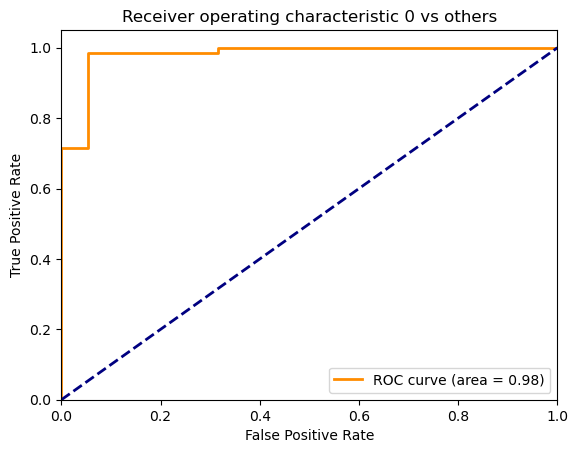

In [90]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Catboost

In [91]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {'learning_rate': [0.001, 0.03, 0.1, 1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


model_cb = CatBoostClassifier(
        loss_function = 'Logloss',
        random_seed=43,
        logging_level='Silent',

        iterations = 500,
        depth = 4,
        has_time = False,
        learning_rate = .01
    )

grid_search = GridSearchCV(model_cb, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics.xlsx")

KeyboardInterrupt: 

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### SVC

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
        'C':[0.1,1,10,50,100],
        'kernel':['rbf','poly','sigmoid','linear'],
        'degree':[1,2,3,4,5,6],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    }


model_svc = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(model_svc, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
  #  random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

## X = данные за 1-5 дни, У = Послеоперационные фистулы бх+В/С

In [ ]:
num_columns_begin = ['Возраст',
              'Время операции, мин',
              'Объем кровопотери, мл',
             # 'Продолжительность дренирования, сут',
              'ИМТ',
              'Размеры опухоли, см3',
              'Амилаза крови 1-5 п/о дни',
              'Амилаза дренажа 1-5 п/о дни',
              'Лейкоциты, ОАК 1-5 п/о дни' ,
              ]




In [ ]:
data_preprocessor_begin = ColumnTransformer(
    [
        ('cat', StandardScaler(), cat_columns),
        ('num', StandardScaler(), num_columns_begin)
    ], 
    remainder='passthrough'
) 

pipe_final_begin = Pipeline(
    [
        ('preprocessor', data_preprocessor_begin),
        ('models', DecisionTreeClassifier(random_state=42))
    ]
) 

In [ ]:
X_begin = data.drop(['Послеоперационные фистулы 2 класса', 
               'Послеоперационные фистулы В/С', 
               'Послеоперационные фистулы бх+В/С', 
               'Амилаза крови 10-15 п/о дни',
                    'Амилаза дренажа 10-15 п/о дни',
                    #'Лейкоциты, ОАК 1-3 п/о дни',
                    'Лейкоциты, ОАК 5-7 п/о дни',
                    'Лейкоциты, ОАК 10-15 п/о дни'], axis=1)

columns_names = cat_columns + num_columns_begin

y = data['Послеоперационные фистулы бх+В/С']

### Логистическая регрессия

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid ={
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['liblinear', 'sag','saga'],
    'max_iter' : [10000]
    #'penalty' : ['l2', 'l1']
    }


clf_model = LogisticRegression()
grid_search = GridSearchCV(clf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Random forest

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 10)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Catboost

In [ ]:
param_grid = {'learning_rate': [0.03, 0.001, 0.1, 1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


model_cb = CatBoostClassifier(
        loss_function = 'Logloss',
        random_seed=43,
        logging_level='Silent',

        iterations = 500,
        depth = 4,
        has_time = False,
        learning_rate = .01
    )

grid_search = GridSearchCV(model_cb, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### SVC

In [ ]:
param_grid = {
        'C':[0.1,1,10,50,100],
#        'kernel':['rbf','poly','sigmoid','linear'],
        'degree':[1,2,3,4,5,6],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    }


model_svc = SVC(probability=True, random_state=42)

grid_search = RandomizedSearchCV(model_svc, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

## X = Все данные кроме хронологических

In [ ]:
num_columns_zero = ['Возраст',
              'Время операции, мин',
              'Объем кровопотери, мл',
              #'Продолжительность дренирования, сут',
              'ИМТ',
              'Размеры опухоли, см3']

data_preprocessor_zero = ColumnTransformer(
    [
        ('cat', StandardScaler(), cat_columns),
        ('num', StandardScaler(), num_columns_zero)
    ], 
    remainder='passthrough'
) 

pipe_final_zero = Pipeline(
    [
        ('preprocessor', data_preprocessor_zero),
        ('models', DecisionTreeClassifier(random_state=42))
    ]
) 

X_zero = data.drop(['Послеоперационные фистулы 2 класса', 
               'Послеоперационные фистулы В/С', 
               'Послеоперационные фистулы бх+В/С', 
               'Амилаза крови 1-5 п/о дни', 'Амилаза крови 10-15 п/о дни',
       'Амилаза дренажа 1-5 п/о дни', 'Амилаза дренажа 10-15 п/о дни',
      # 'Лейкоциты, ОАК 1-3 п/о дни', 
                    'Лейкоциты, ОАК 1-5 п/о дни',
       'Лейкоциты, ОАК 5-7 п/о дни', 'Лейкоциты, ОАК 10-15 п/о дни'], axis=1)

columns_names = cat_columns + num_columns_zero

y = data['Послеоперационные фистулы бх+В/С']


### Логистическая регрессия

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid ={
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['liblinear', 'sag','saga'],
    'max_iter' : [10000]
    #'penalty' : ['l2', 'l1']
    }


clf_model = LogisticRegression()
grid_search = GridSearchCV(clf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Random forest

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 10)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Catboost

In [ ]:
param_grid = {'learning_rate': [0.03, 0.1, 1, 0.001],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


model_cb = CatBoostClassifier(
        loss_function = 'Logloss',
        random_seed=42,
        logging_level='Silent',

        iterations = 500,
        depth = 4,
        has_time = False,
        learning_rate = .01
    )

grid_search = GridSearchCV(model_cb, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### SVC

In [ ]:
param_grid = {
        'C':[0.1,1,10,50,100],
        'kernel':['rbf','poly','sigmoid','linear'],
        'degree':[1,2,3,4,5,6],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    }


model_svc = SVC(probability=True, random_state=42)

grid_search = RandomizedSearchCV(model_svc, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds.append(rf_all)
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

# Сбор метрик, У = Послеоперационные фистулы В/С

## X = Все данные

In [96]:
X = data.drop(['Послеоперационные фистулы 2 класса', 'Послеоперационные фистулы В/С', 'Послеоперационные фистулы бх+В/С'], axis=1)
y = data['Послеоперационные фистулы В/С']

columns_names = cat_columns + num_columns

In [97]:
ds2 = []

### Логистическая регрессия

In [94]:
simplefilter(action='ignore', category=FutureWarning)

param_grid ={
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['liblinear', 'sag','saga'],
    'max_iter' : [10000]
    #'penalty' : ['l2', 'l1']
    }


clf_model = LogisticRegression()
grid_search = GridSearchCV(clf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds2.append(rf_all)
metrics = pd.DataFrame(ds2)
metrics.to_excel(x+"model_metrics_bc.xlsx")

Best Hyperparameters: {'C': 0.002335721469090121, 'max_iter': 10000, 'solver': 'liblinear'}
Best Cross-Validation Score: 0.8691666666666666
roc_auc по Шурику: 0.8127705627705628
roc_auc средний: 0.8423611111111112


In [95]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

KeyboardInterrupt: 

### Random forest

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 10)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds2.append(rf_all)
metrics = pd.DataFrame(ds2)
metrics.to_excel(x+"model_metrics_bc.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Catboost

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {'learning_rate': [0.03, 0.1, 0.001, 1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


model_cb = CatBoostClassifier(
        loss_function = 'Logloss',
        random_seed=42,
        logging_level='Silent',

        iterations = 500,
        depth = 4,
        has_time = False,
        learning_rate = .01
    )

grid_search = GridSearchCV(model_cb, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds2.append(rf_all)
metrics = pd.DataFrame(ds2)
metrics.to_excel(x+"model_metrics_bc.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### SVC

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
        'C':[0.1,1,10,50,100],
        'kernel':['rbf','poly','sigmoid','linear'],
        'degree':[1,2,3,4,5,6],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    }


model_svc = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(model_svc, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
  #  random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds2.append(rf_all)
metrics = pd.DataFrame(ds2)
metrics.to_excel(x+"model_metrics_bc.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

## X = Данные за 1-5 дни

In [98]:
X_begin = data.drop(['Послеоперационные фистулы 2 класса', 
               'Послеоперационные фистулы В/С', 
               'Послеоперационные фистулы бх+В/С', 
               'Амилаза крови 10-15 п/о дни',
                    'Амилаза дренажа 10-15 п/о дни',
                   # 'Лейкоциты, ОАК 1-3 п/о дни',
                    'Лейкоциты, ОАК 5-7 п/о дни',
                    'Лейкоциты, ОАК 10-15 п/о дни'], axis=1)

columns_names = cat_columns + num_columns_begin

y = data['Послеоперационные фистулы В/С']

### Логистическая регрессия

In [99]:
simplefilter(action='ignore', category=FutureWarning)

param_grid ={
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['liblinear', 'sag','saga'],
    'max_iter' : [10000]
    #'penalty' : ['l2', 'l1']
    }


clf_model = LogisticRegression()
grid_search = GridSearchCV(clf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds2.append(rf_all)
metrics = pd.DataFrame(ds2)
metrics.to_excel(x+"model_metrics_bc.xlsx")

Best Hyperparameters: {'C': 1.8329807108324338e-05, 'max_iter': 10000, 'solver': 'saga'}
Best Cross-Validation Score: 0.757638888888889
roc_auc по Шурику: 0.49891774891774887
roc_auc средний: 0.7765277777777777


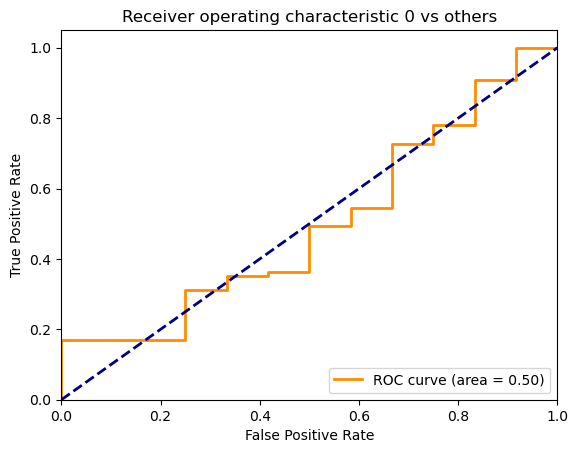

In [100]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### random forest

In [101]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 10)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
  #  random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds2.append(rf_all)
metrics = pd.DataFrame(ds2)
metrics.to_excel(x+"model_metrics_bc.xlsx")

Best Hyperparameters: {'max_depth': 13, 'min_samples_leaf': 2, 'n_estimators': 700}
Best Cross-Validation Score: 0.7869444444444444
roc_auc по Шурику: 0.8257575757575757
roc_auc средний: 0.8141666666666666


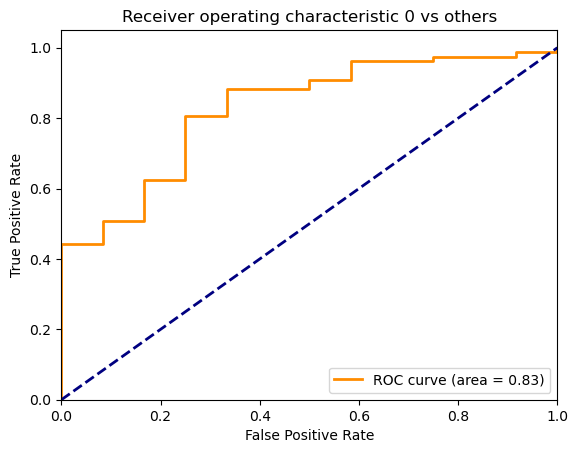

In [102]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Catboost

In [103]:
param_grid = {'learning_rate': [0.03, 0.1, 0.001, 1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


model_cb = CatBoostClassifier(
        loss_function = 'Logloss',
        random_seed=42,
        logging_level='Silent',

        iterations = 500,
        depth = 4,
        has_time = False,
        learning_rate = .01
    )

grid_search = GridSearchCV(model_cb, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds2.append(rf_all)
metrics = pd.DataFrame(ds2)
metrics.to_excel(x+"model_metrics_bc.xlsx")

Best Hyperparameters: {'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 1}
Best Cross-Validation Score: 0.8061111111111112
roc_auc по Шурику: 0.7207792207792207
roc_auc средний: 0.7125


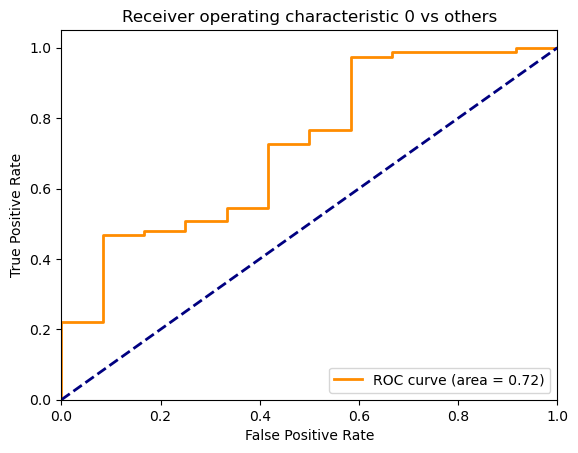

In [104]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### SVC

In [ ]:
param_grid = {
        'C':[0.1,1,10,50,100],
        'kernel':['rbf','poly','sigmoid','linear'],
        'degree':[1,2,3,4,5,6],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    }


model_svc = SVC(probability=True, random_state=42)

grid_search = RandomizedSearchCV(model_svc, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds2.append(rf_all)
metrics = pd.DataFrame(ds2)
metrics.to_excel(x+"model_metrics_bc.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

## X = Все данные кроме хронологических

In [ ]:
X_zero = data.drop(['Послеоперационные фистулы 2 класса', 
               'Послеоперационные фистулы В/С', 
               'Послеоперационные фистулы бх+В/С', 
               'Амилаза крови 1-5 п/о дни', 'Амилаза крови 10-15 п/о дни',
       'Амилаза дренажа 1-5 п/о дни', 'Амилаза дренажа 10-15 п/о дни',
       #'Лейкоциты, ОАК 1-3 п/о дни', 
                    'Лейкоциты, ОАК 1-5 п/о дни',
       'Лейкоциты, ОАК 5-7 п/о дни', 'Лейкоциты, ОАК 10-15 п/о дни'], axis=1)

columns_names = cat_columns + num_columns_zero

y = data['Послеоперационные фистулы В/С']

### Логистическая регрессия

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid ={
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['liblinear', 'sag','saga'],
    'max_iter' : [10000]
    #'penalty' : ['l2', 'l1']
    }


clf_model = LogisticRegression()
grid_search = GridSearchCV(clf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
  #  random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds2.append(rf_all)
metrics = pd.DataFrame(ds2)
metrics.to_excel(x+"model_metrics_bc.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Random forest

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 10)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds2.append(rf_all)
metrics = pd.DataFrame(ds2)
metrics.to_excel(x+"model_metrics_bc.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Catboost

In [ ]:
param_grid = {'learning_rate': [0.03, 0.1, 0.001, 1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


model_cb = CatBoostClassifier(
        loss_function = 'Logloss',
        random_seed=42,
        logging_level='Silent',

        iterations = 500,
        depth = 4,
        has_time = False,
        learning_rate = .01
    )

grid_search = GridSearchCV(model_cb, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
 #   random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds2.append(rf_all)
metrics = pd.DataFrame(ds2)
metrics.to_excel(x+"model_metrics_bc.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### SVC

In [ ]:
param_grid = {
        'C':[0.1,1,10,50,100],
        'kernel':['rbf','poly','sigmoid','linear'],
        'degree':[1,2,3,4,5,6],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    }


model_svc = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(model_svc, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    #random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds2.append(rf_all)
metrics = pd.DataFrame(ds2)
metrics.to_excel(x+"model_metrics_bc.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

# Сбор метрик Y = Послеоперационные фистулы 2 класса

## X = все данные

In [ ]:
X = data.drop(['Послеоперационные фистулы 2 класса', 'Послеоперационные фистулы В/С', 'Послеоперационные фистулы бх+В/С'], axis=1)
y = data['Послеоперационные фистулы 2 класса']

columns_names = cat_columns + num_columns

In [ ]:
ds3 = []

### Логистическая регрессия

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid ={
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['liblinear', 'sag','saga'],
    'max_iter' : [10000]
    #'penalty' : ['l2', 'l1']
    }


clf_model = LogisticRegression()
grid_search = GridSearchCV(clf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds3.append(rf_all)
metrics = pd.DataFrame(ds3)
metrics.to_excel(x+"model_metrics_2cl.xlsx")

In [ ]:
plt.rcParams.update({'font.size': 12})
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.savefig(x+"Все 2класса" + name + ".png")
    plt.show()
    

    
    
    
    

plot_roc(res['true'] == 0, res[0], '0 vs others')

plot_roc(res['true'] == 1, res[1], '1 vs others')

plot_roc(res['true'] == 2, res[2], '2 vs others')

plot_roc(res[res['true'] > 0]['true'] == 2, res[res['true'] > 0][2], '1 vs 2')

### Random forest

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 10)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds3.append(rf_all)
metrics = pd.DataFrame(ds3)
metrics.to_excel(x+"model_metrics_2cl.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Catboost

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {'learning_rate': [0.03, 0.1, 1, 0.001],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


model_cb = CatBoostClassifier(
        loss_function = 'MultiClass',
        random_seed=42,
        logging_level='Silent',

        iterations = 500,
        depth = 4,
        has_time = False,
        learning_rate = .01
    )

grid_search = GridSearchCV(model_cb, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds3.append(rf_all)
metrics = pd.DataFrame(ds3)
metrics.to_excel(x+"model_metrics_2cl.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### SVC

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
        'C':[0.1,1,10,50,100],
        'kernel':['rbf','poly','sigmoid','linear'],
        'degree':[1,2,3,4,5,6],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    }


model_svc = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(model_svc, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
#    random_state=43,
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds3.append(rf_all)
metrics = pd.DataFrame(ds3)
metrics.to_excel(x+"model_metrics_2cl.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

## X = Данные за 1-5 дни

In [ ]:
X_begin = data.drop(['Послеоперационные фистулы 2 класса', 
               'Послеоперационные фистулы В/С', 
               'Послеоперационные фистулы бх+В/С', 
               'Амилаза крови 10-15 п/о дни',
                    'Амилаза дренажа 10-15 п/о дни',
                    #'Лейкоциты, ОАК 1-3 п/о дни',
                    'Лейкоциты, ОАК 5-7 п/о дни',
                    'Лейкоциты, ОАК 10-15 п/о дни'], axis=1)

columns_names = cat_columns + num_columns_begin

y = data['Послеоперационные фистулы 2 класса']

In [ ]:
from sklearn.feature_selection import RFE

### Логистическая регрессия

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid ={
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['liblinear', 'sag','saga'],
    'max_iter' : [10000]
    #'penalty' : ['l2', 'l1']
    }


clf_model = LogisticRegression()
grid_search = RandomizedSearchCV(clf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
    random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)



print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds3.append(rf_all)
metrics = pd.DataFrame(ds3)
metrics.to_excel(x+"model_metrics_2cl.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Random forest

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 10)
}


rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds3.append(rf_all)
metrics = pd.DataFrame(ds3)
metrics.to_excel(x+"model_metrics_2cl.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### Catboost

In [ ]:
param_grid = {'learning_rate': [0.03, 0.1, 1, 0.001],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


model_cb = CatBoostClassifier(
        loss_function = 'MultiClass',
        random_seed=42,
        logging_level='Silent',

        iterations = 500,
        depth = 4,
        has_time = False,
        learning_rate = .01
    )

grid_search = GridSearchCV(model_cb, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds3.append(rf_all)
metrics = pd.DataFrame(ds3)
metrics.to_excel(x+"model_metrics_2cl.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

### SVC

In [ ]:
param_grid = {
        'C':[0.1,1,10,50,100],
        'kernel':['rbf','poly','sigmoid','linear'],
        'degree':[1,2,3,4,5,6],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    }


model_svc = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(model_svc, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X_begin, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_begin, y):
        X_train, X_test = X_begin.iloc[train_index], X_begin.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_begin.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_begin.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds3.append(rf_all)
metrics = pd.DataFrame(ds3)
metrics.to_excel(x+"model_metrics_2cl.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

## X = Все данные кроме хронологических

In [ ]:
X_zero = data.drop(['Послеоперационные фистулы 2 класса', 
               'Послеоперационные фистулы В/С', 
               'Послеоперационные фистулы бх+В/С', 
               'Амилаза крови 1-5 п/о дни', 'Амилаза крови 10-15 п/о дни',
       'Амилаза дренажа 1-5 п/о дни', 'Амилаза дренажа 10-15 п/о дни',
      # 'Лейкоциты, ОАК 1-3 п/о дни', 
                    'Лейкоциты, ОАК 1-5 п/о дни',
       'Лейкоциты, ОАК 5-7 п/о дни', 'Лейкоциты, ОАК 10-15 п/о дни'], axis=1)

columns_names = cat_columns + num_columns_zero

y = data['Послеоперационные фистулы 2 класса']

### Логистическая регрессия

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid ={
    'C' : np.logspace(-10, 10, 20),
    'solver' : ['liblinear', 'sag','saga'],
    'max_iter' : [10000]
    #'penalty' : ['l2', 'l1']
    }



clf_model = LogisticRegression()
grid_search = GridSearchCV(clf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
#grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds3.append(rf_all)
metrics = pd.DataFrame(ds3)
metrics.to_excel(x+"model_metrics_2cl.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')
plot_roc(res['true'] == 1, res[1], '1 vs others')
#plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1a.jpg")
plot_roc(res['true'] == 2, res[2], '2 vs others')

plot_roc(res[res['true'] > 0]['true'] == 2, res[res['true'] > 0][2], '1 vs 2')

### Random forest

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

param_grid = {
    'n_estimators': [300, 500, 700, 1000, 2000, 5000],
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 10)
}



rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
#grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds3.append(rf_all)
metrics = pd.DataFrame(ds3)
metrics.to_excel(x+"model_metrics_2cl.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    

plot_roc(res['true'] == 0, res[0], '0 vs others')
plot_roc(res['true'] == 1, res[1], '1 vs others')
#plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1a.jpg")
plot_roc(res['true'] == 2, res[2], '2 vs others')

plot_roc(res[res['true'] > 0]['true'] == 2, res[res['true'] > 0][2], '1 vs 2')

### Catboost

In [ ]:
param_grid = {'learning_rate': [0.03, 0.1, 0.001, 1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


model_cb = CatBoostClassifier(
        loss_function = 'MultiClass',
        random_seed=42,
        logging_level='Silent',

        iterations = 500,
        depth = 4,
        has_time = False,
        learning_rate = .01
    )

grid_search = GridSearchCV(model_cb, 
    param_grid, 
    cv=5,
    scoring='roc_auc_ovr',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc))


rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds3.append(rf_all)
metrics = pd.DataFrame(ds3)
metrics.to_excel(x+"model_metrics_2cl.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')
plot_roc(res['true'] == 1, res[1], '1 vs others')
#plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1a.jpg")
plot_roc(res['true'] == 2, res[2], '2 vs others')

plot_roc(res[res['true'] > 0]['true'] == 2, res[res['true'] > 0][2], '1 vs 2')

### SVC

In [ ]:
param_grid = {
        'C':[0.1,1,10,50,100],
        'kernel':['rbf','poly','sigmoid','linear'],
        'degree':[1,2,3,4,5,6],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    }


model_svc = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(model_svc, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
   # random_state=43,
    n_jobs=-1
)
grid_search.fit(X_zero, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

roc_auc = []
y_pred = []
y_true = []
ind = []

skf = StratifiedKFold(n_splits=5, random_state = 43, shuffle = True)

for train_index, test_index in skf.split(X_zero, y):
        X_train, X_test = X_zero.iloc[train_index], X_zero.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        X_train_roc = pd.DataFrame(data_preprocessor_zero.fit_transform(X_train))
        X_test_roc = pd.DataFrame(data_preprocessor_zero.transform(X_test))
        X_train_roc.columns = [columns_names]
        X_test_roc.columns = [columns_names]
        y_train_roc = encoder.fit_transform(y_train)
        y_test_roc = encoder.transform(y_test)

        grid_search.best_estimator_.fit(X_train_roc, y_train_roc)
        
        roc_dict = roc_multi(y_test_roc, grid_search.best_estimator_.predict_proba(X_test_roc))
        auc_test = np.mean(list(roc_dict[0].values()))
        
        roc_dict = roc_multi(y_train_roc, grid_search.best_estimator_.predict_proba(X_train_roc))
        auc_train = np.mean(list(roc_dict[0].values()))
        

        roc_auc.append(auc_test)

        y_true.extend(y_test_roc)
        y_pred.extend(grid_search.best_estimator_.predict_proba(X_test_roc))
        ind.extend(test_index)
        
y_pred = np.array(y_pred)
y_true = np.array(y_true)
roc_dict = roc_multi(y_true, y_pred)
auc_all = np.mean(list(roc_dict[0].values()))
    
grid_search.best_estimator_.fit(X_train_roc, y_train_roc)

print('roc_auc по Шурику:', auc_all)
print('roc_auc средний:', np.mean(roc_auc)) 

rf_rocauc = {"roc_auc": auc_all, 'roc_auc средний': np.mean(roc_auc), 'roc_auc stdv': np.std(roc_auc), 'best cv':  grid_search.best_score_}
rf_all = dict(list(rf_rocauc.items()) + list(grid_search.best_params_.items()))
#df = pd.DataFrame.from_dict(rf_all, orient='index').reset_index().transpose()
ds3.append(rf_all)
metrics = pd.DataFrame(ds3)
metrics.to_excel(x+"model_metrics_2cl.xlsx")

In [ ]:
res = pd.DataFrame(y_pred)
res['true'] = y_true
res['ID'] = ind
res[res['true'] > 0].sort_values(1)[:20]


def plot_roc(y_true, y_pred, name = ''):

    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic '+ name)
    plt.legend(loc="lower right")
    #plt.savefig("E:/Рак поджелудочной железы/ВКР/Article1/версия2/plot1"+ name + "_t-model" #+ "_3-5_pdr" 
     #           + '.jpg')
    plt.show()
    
plot_roc(res['true'] == 0, res[0], '0 vs others')

In [ ]:
metrics = pd.DataFrame(ds)
metrics.to_excel(x+"model_metrics_RF2.xlsx")